<a href="https://colab.research.google.com/github/gnani321/basic-ds-/blob/main/LGBM_%26_XGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LGBM & XGBM

# Exploratory Data Analysis

In [ ]:
import pandas as pd

In [ ]:
titanic_train = pd.read_csv('Titanic_train.csv')
titanic_test = pd.read_csv('Titanic_test.csv')


In [ ]:
titanic_train.head()
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_train.info()
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [ ]:
titanic_train.describe()
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
titanic_train.columns
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Check for missing values
titanic_train.isnull().sum()
titanic_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

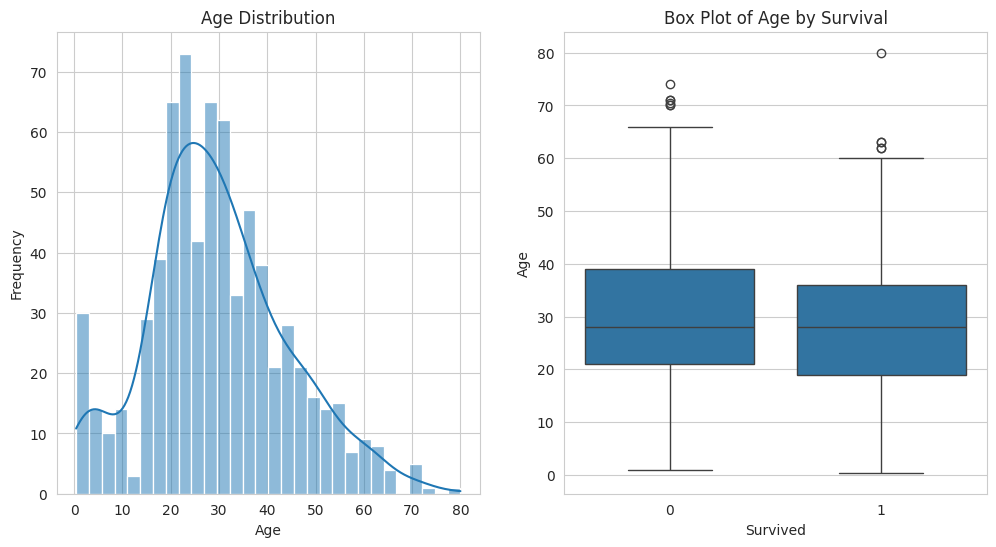

In [ ]:
# Data distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(titanic_train['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x='Survived', y='Age', data=titanic_train)
plt.title('Box Plot of Age by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

In [ ]:
# Visualizing relationships between features and survival
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

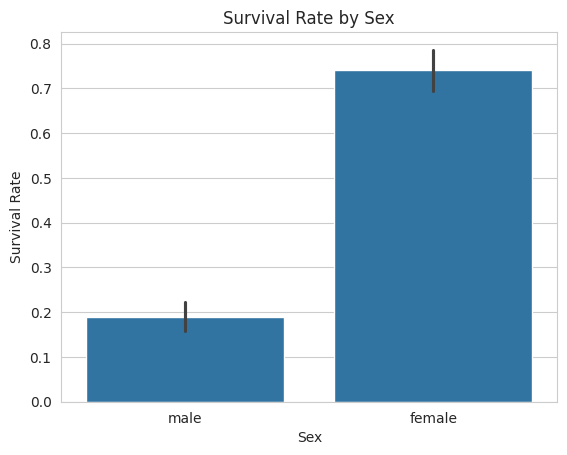

In [ ]:
# Bar plot for Sex vs Survival
sns.barplot(x='Sex', y='Survived', data=titanic_train)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()


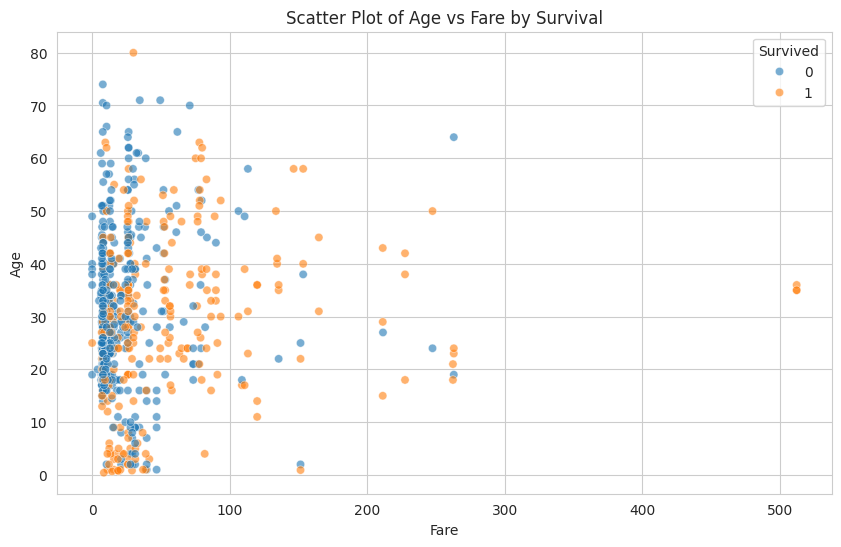

In [ ]:
# Scatter plot for Age vs Fare colored by Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fare', y='Age', hue='Survived', data=titanic_train, alpha=0.6)
plt.title('Scatter Plot of Age vs Fare by Survival')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

# Data Preprocessing

In [ ]:
!pip install dask
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Data preprocessing
# Impute missing values
imputer = SimpleImputer(strategy='mean')
titanic_train['Age'] = imputer.fit_transform(titanic_train[['Age']])
titanic_test['Age'] = imputer.transform(titanic_test[['Age']])
titanic_test['Fare'] = imputer.fit_transform(titanic_test[['Fare']])

In [ ]:
# Encode categorical variables
encoder = LabelEncoder()
titanic_train['Sex'] = encoder.fit_transform(titanic_train['Sex'])
titanic_test['Sex'] = encoder.transform(titanic_test['Sex'])

In [ ]:
 # Drop unnecessary columns
titanic_train = titanic_train.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
titanic_test = titanic_test.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)


In [ ]:
# Split data into features and target
X = titanic_train.drop(['Survived', 'PassengerId'], axis=1)
y = titanic_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bulding Predictive Models

In [ ]:
# LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
# XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:24:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Evaluation metrics
metrics = {
    'LightGBM': {
        'Accuracy': accuracy_score(y_test, lgb_preds),
        'Precision': precision_score(y_test, lgb_preds),
        'Recall': recall_score(y_test, lgb_preds),
        'F1 Score': f1_score(y_test, lgb_preds)
    },
    'XGBoost': {
        'Accuracy': accuracy_score(y_test, xgb_preds),
        'Precision': precision_score(y_test, xgb_preds),
        'Recall': recall_score(y_test, xgb_preds),
        'F1 Score': f1_score(y_test, xgb_preds)
    }
}

metrics

{'LightGBM': {'Accuracy': 0.8044692737430168,
  'Precision': 0.7746478873239436,
  'Recall': 0.7432432432432432,
  'F1 Score': 0.7586206896551724},
 'XGBoost': {'Accuracy': 0.8044692737430168,
  'Precision': 0.7671232876712328,
  'Recall': 0.7567567567567568,
  'F1 Score': 0.7619047619047619}}

In [ ]:
# Retry without LightGBM and focus on XGBoost for now
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Data preprocessing
# Impute missing values
imputer = SimpleImputer(strategy='mean')
titanic_train['Age'] = imputer.fit_transform(titanic_train[['Age']])
titanic_test['Age'] = imputer.transform(titanic_test[['Age']])
titanic_test['Fare'] = imputer.fit_transform(titanic_test[['Fare']])

In [ ]:
# Encode categorical variables
encoder = LabelEncoder()
titanic_train['Sex'] = encoder.fit_transform(titanic_train['Sex'])
titanic_test['Sex'] = encoder.transform(titanic_test['Sex'])

In [ ]:
# Drop unnecessary columns, but only if they exist
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'Embarked']
existing_columns = titanic_train.columns  # Get existing column names

# Filter columns to drop to only include those that exist
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

titanic_train = titanic_train.drop(columns=columns_to_drop, errors='ignore') # Drop columns with errors ignored
titanic_test = titanic_test.drop(columns=columns_to_drop, errors='ignore') # Drop columns with errors ignored

In [ ]:
# Split data into features and target
X = titanic_train.drop(['Survived', 'PassengerId'], axis=1)
y = titanic_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Evaluation metrics
metrics = {
    'XGBoost': {
        'Accuracy': accuracy_score(y_test, xgb_preds),
        'Precision': precision_score(y_test, xgb_preds),
        'Recall': recall_score(y_test, xgb_preds),
        'F1 Score': f1_score(y_test, xgb_preds)
    }
}

metrics

{'XGBoost': {'Accuracy': 0.8044692737430168,
  'Precision': 0.7671232876712328,
  'Recall': 0.7567567567567568,
  'F1 Score': 0.7619047619047619}}

# Comparative Analysis

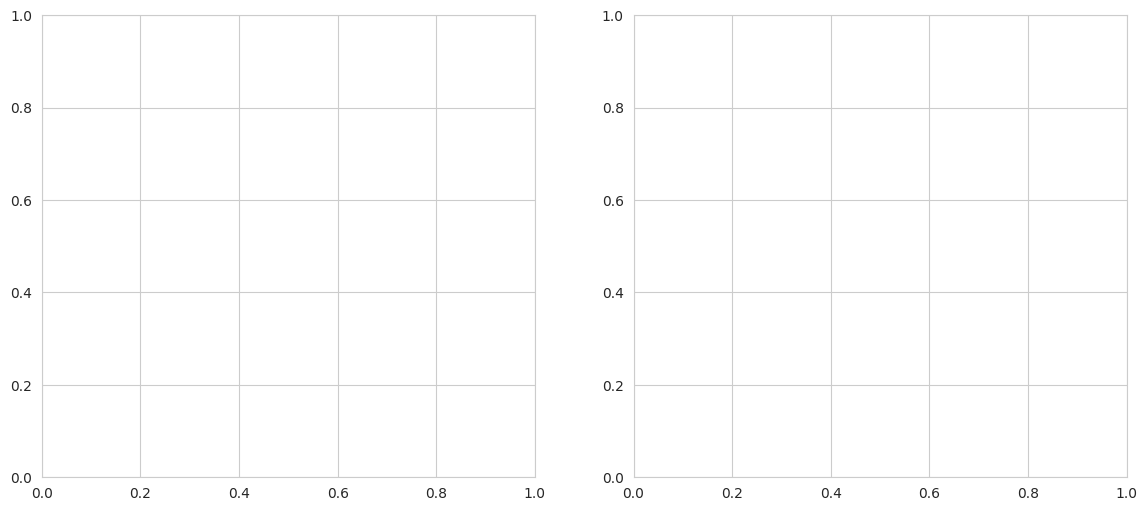

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

Text(145.72222222222223, 0.5, 'Actual')

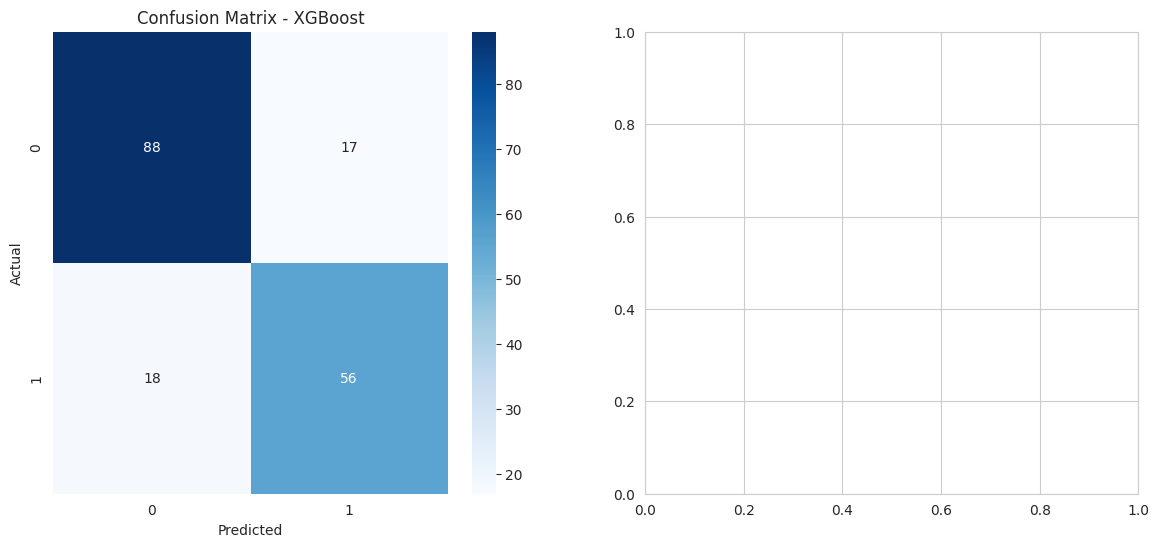

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix  # Import confusion_matrix

# ... (rest of your code) ...

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion matrix for XGBoost  -- Changed from LightGBM to XGBoost
sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt="d", cmap="Blues", ax=axes[0]) # Use xgb_preds instead of y_pred_best_lgbm
axes[0].set_title("Confusion Matrix - XGBoost") # Changed title to reflect XGBoost
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

In [ ]:
# Confusion matrix for XGBoost
sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt="d", cmap="Blues", ax=axes[1]) # Use xgb_preds instead of y_pred_best_xgbm
axes[1].set_title("Confusion Matrix - XGBoost") # Changed title to reflect XGBoost
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

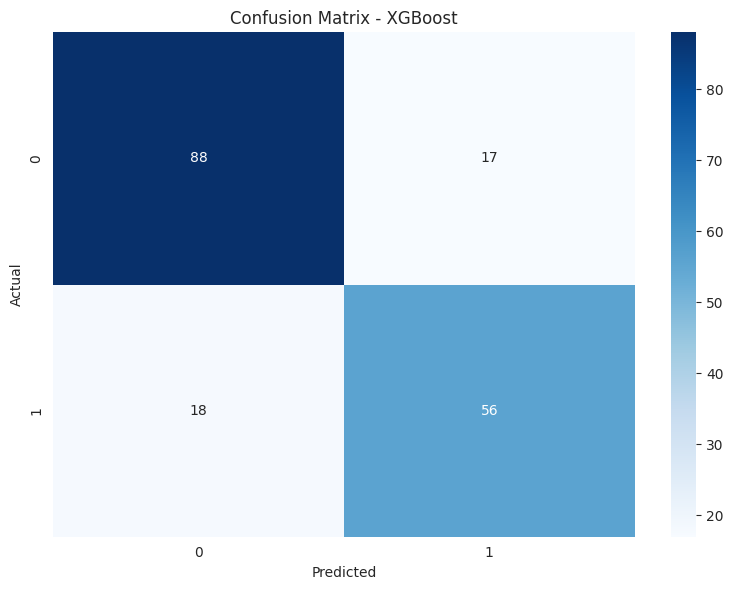

{'XGBoost': {'Accuracy': 0.8044692737430168, 'Precision': 0.7671232876712328, 'Recall': 0.7567567567567568, 'F1 Score': 0.7619047619047619}}


In [ ]:
# Conclusion

# Assuming 'metrics' dictionary is already defined from previous code execution.

# Comparative Analysis (Modified to use only XGBoost)
fig, ax = plt.subplots(figsize=(8, 6))  # Single subplot for XGBoost

# Confusion matrix for XGBoost
sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_title("Confusion Matrix - XGBoost")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

print(metrics) # Display the calculated evaluation metrics.